# **Libraries**

In [43]:
from google.colab import drive

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

!pip install fastapi uvicorn pyngrok joblib nest-asyncio
import nest_asyncio
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
from pyngrok import ngrok
import uvicorn
from fastapi.responses import FileResponse

ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.12/dist-packages/uvicorn/server.py:69> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/server.py", line 67, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.12/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run
    se

# **Dataset Upload**

In [2]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/MedSecureAI - Cybersecurity Team/MOP_UseCase11_Project/datasets/NSL_KDD/'

Mounted at /content/drive


In [3]:
train = pd.read_csv(path + 'KDDTrain+.txt', header=None)
train_20 = pd.read_csv(path + 'KDDTrain+_20Percent.txt', header=None)
test = pd.read_csv(path + 'KDDTest+.txt', header=None)
test_21 = pd.read_csv(path + 'KDDTest-21.txt', header=None)
attack_types = pd.read_csv(path + 'Attack Types.csv', header=None)
field_names = pd.read_csv(path + 'Field Names.csv', header=None)
small_train = pd.read_csv(path + 'Small Training Set.csv', header=None)

# **Overview**

In [4]:
print('KDDTrain+:')
train.info()

print('\nKDDTrain+_20Percent:')
train_20.info()

print('\nKDDTest+:')
test.info()

print('\nKDDTest-21:')
test_21.info()

print('\nSmall Training Set:')
small_train.info()

KDDTrain+:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  int64  
 21 

In [5]:
print('KDDTrain+:', train.describe())
print('\nKDDTrain+_20Percent:', train_20.describe())
print('\nKDDTest+:', test.describe())
print('\nKDDTest-21:', test_21.describe())
print('\nSmall Training Set:', small_train.describe())

KDDTrain+:                  0             4             5              6              7   \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198       0.022687   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086       0.253530   
min         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000       3.000000   

                  8              9              10             11  \
count  125973.000000  125973.000000  125973.000000  125973.000000   
mean        0.000111       0.204409       0.001222       0.395736   
std         0.014366       2.149968       0.045239  

In [6]:
print('KDDTrain+:', train.shape, '\n')
print(train.head(3))
print('-' * 50)

print('KDDTrain+_20Percent:', train_20.shape, '\n')
print(train_20.head(3))
print('-' * 50)

print('KDDTest+:', test.shape, '\n')
print(test.head(3))
print('-' * 50)

print('KDDTest-21:', test_21.shape, '\n')
print(test_21.head(3))
print('-' * 50)

print('Attack Types:', attack_types.shape, '\n')
print(attack_types.head(3))
print('-' * 50)

print('Field Names:', field_names.shape, '\n')
print(field_names.head(3))
print('-' * 50)

print('Small Training Set:', small_train.shape, '\n')
print(small_train.head(3))

KDDTrain+: (125973, 43) 

   0    1         2   3    4   5   6   7   8   9   ...    33    34    35   36  \
0   0  tcp  ftp_data  SF  491   0   0   0   0   0  ...  0.17  0.03  0.17  0.0   
1   0  udp     other  SF  146   0   0   0   0   0  ...  0.00  0.60  0.88  0.0   
2   0  tcp   private  S0    0   0   0   0   0   0  ...  0.10  0.05  0.00  0.0   

    37   38    39   40       41  42  
0  0.0  0.0  0.05  0.0   normal  20  
1  0.0  0.0  0.00  0.0   normal  15  
2  1.0  1.0  0.00  0.0  neptune  19  

[3 rows x 43 columns]
--------------------------------------------------
KDDTrain+_20Percent: (25192, 43) 

   0    1         2   3    4   5   6   7   8   9   ...    33    34    35   36  \
0   0  tcp  ftp_data  SF  491   0   0   0   0   0  ...  0.17  0.03  0.17  0.0   
1   0  udp     other  SF  146   0   0   0   0   0  ...  0.00  0.60  0.88  0.0   
2   0  tcp   private  S0    0   0   0   0   0   0  ...  0.10  0.05  0.00  0.0   

    37   38    39   40       41  42  
0  0.0  0.0  0.05  0.0   

# **Pre-Processing**



---


**1. Assign Column Headers**

In [7]:
column_names = field_names[0].tolist()
column_names += ['attack_types', 'difficulty_level']

In [8]:
train.columns = column_names
train_20.columns = column_names
test.columns = column_names
test_21.columns = column_names
small_train.columns = column_names

In [9]:
for df in [train, train_20, test, test_21, small_train]:
  df.columns = column_names

In [10]:
# Check the datasets with headers

print('KDDTrain+:', train.shape, '\n')
print(train.head(3))
print('-' * 50)

print('KDDTrain+_20Percent:', train_20.shape, '\n')
print(train_20.head(3))
print('-' * 50)

print('KDDTest+:', test.shape, '\n')
print(test.head(3))
print('-' * 50)

print('KDDTest-21:', test_21.shape, '\n')
print(test_21.head(3))
print('-' * 50)

print('Small Training Set:', small_train.shape, '\n')
print(small_train.head(3))

KDDTrain+: (125973, 43) 

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0 


---

**2. Categorise Attack Types**

In [11]:
# Categorise specific attack types into broader categories

attack_map = dict(zip(attack_types[0], attack_types[1]))
attack_map['normal'] = 'normal'

# Update train and test datasets with attack categories

train['attack_category'] = train['attack_types'].map(attack_map)
train_20['attack_category'] = train_20['attack_types'].map(attack_map)
test['attack_category'] = test['attack_types'].map(attack_map)
test_21['attack_category'] = test_21['attack_types'].map(attack_map)
small_train['attack_category'] = small_train['attack_types'].map(attack_map)

In [12]:
# Check attack distribution

print('KDDTrain+:', train['attack_category'].value_counts())
print('-' * 50)

print('KDDTrain+_20Percent:', train_20['attack_category'].value_counts())
print('-' * 50)

print('KDDTest+:', test['attack_category'].value_counts())
print('-' * 50)

print('KDDTest-21:', test_21['attack_category'].value_counts())
print('-' * 50)

print('Small Training Set:', small_train['attack_category'].value_counts())

KDDTrain+: attack_category
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64
--------------------------------------------------
KDDTrain+_20Percent: attack_category
normal    13449
dos        9234
probe      2289
r2l         209
u2r          11
Name: count, dtype: int64
--------------------------------------------------
KDDTest+: attack_category
normal    9711
dos       5741
r2l       2199
probe     1106
u2r         37
Name: count, dtype: int64
--------------------------------------------------
KDDTest-21: attack_category
dos       2625
r2l       2199
normal    2152
probe     1097
u2r         37
Name: count, dtype: int64
--------------------------------------------------
Small Training Set: attack_category
normal    516
dos       380
probe      91
r2l        13
u2r        11
Name: count, dtype: int64



---

**3. Check and Handle Missing Values**

In [13]:
# Check total missing values in the whole dataframes

print('Missing Value Count:\n')

print('KDDTrain+:', train.isnull().sum().sum())
print('KDDTrain+_20Percent:', train_20.isnull().sum().sum())
print('KDDTest+:', test.isnull().sum().sum())
print('KDDTest-21:', test_21.isnull().sum().sum())
print('Small Training Set:', small_train.isnull().sum().sum())

Missing Value Count:

KDDTrain+: 0
KDDTrain+_20Percent: 0
KDDTest+: 3750
KDDTest-21: 3740
Small Training Set: 0


In [14]:
# Check columns containing missing values

print('\nColumns containing missing value:\n')

print('KDDTest+:', test.isnull().sum()[test.isnull().sum() > 0])
print('\nKDDTest-21:', test_21.isnull().sum()[test_21.isnull().sum() > 0])


Columns containing missing value:

KDDTest+: attack_category    3750
dtype: int64

KDDTest-21: attack_category    3740
dtype: int64


In [15]:
# Clean datasets containing missing values

test = test.dropna(subset=['attack_category'])
print('KDDTest+:', test.isnull().sum().sum())

test_21 = test_21.dropna(subset=['attack_category'])
print('KDDTest-21:', test_21.isnull().sum().sum())

KDDTest+: 0
KDDTest-21: 0



---

**4. Encoding**

In [16]:
# Encode columns from string to numerical values

encoder = LabelEncoder()

encoded_columns = ['protocol_type', 'service', 'flag']

for col in encoded_columns:
    train[col] = encoder.fit_transform(train[col])
    train_20[col] = encoder.transform(train_20[col])
    test[col] = encoder.transform(test[col])
    test_21[col] = encoder.transform(test_21[col])
    small_train[col] = encoder.transform(small_train[col])

print('KDDTrain+:\n', train[encoded_columns].head())
print('-' * 50)

print('KDDTrain+_20Percent:\n', train_20[encoded_columns].head())
print('-' * 50)

print('KDDTest+:\n', test[encoded_columns].head())
print('-' * 50)

print('KDDTest_21:\n', test_21[encoded_columns].head())
print('-' * 50)

print('Small Training Set:\n', small_train[encoded_columns].head())

KDDTrain+:
    protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
--------------------------------------------------
KDDTrain+_20Percent:
    protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
--------------------------------------------------
KDDTest+:
    protocol_type  service  flag
0              1       49     1
1              1       49     1
2              1       20     9
5              1       24     9
6              1       54     9
--------------------------------------------------
KDDTest_21:
    protocol_type  service  flag
0              1       60     9
3              2       49     9
4              1       49    10
5              1       24     9
6              1       28     1
---------------------


---

**5. Class Distribution**

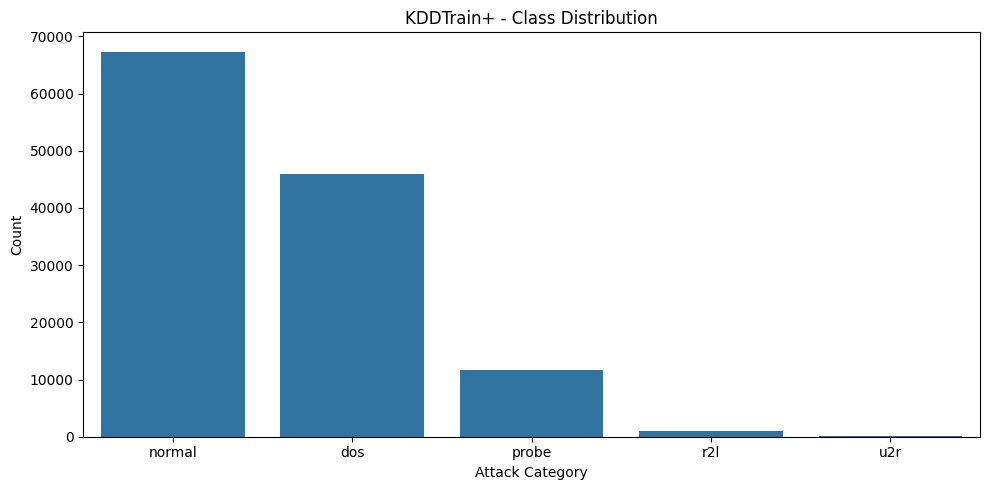

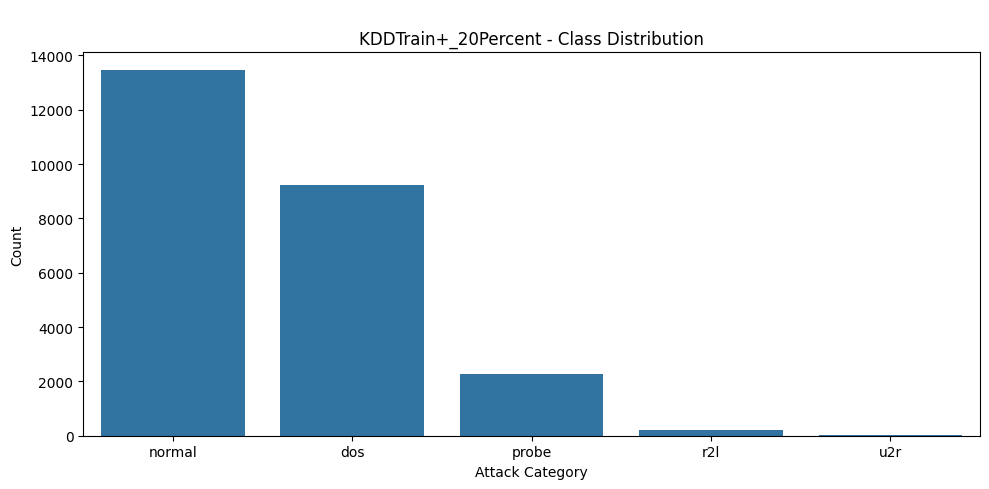

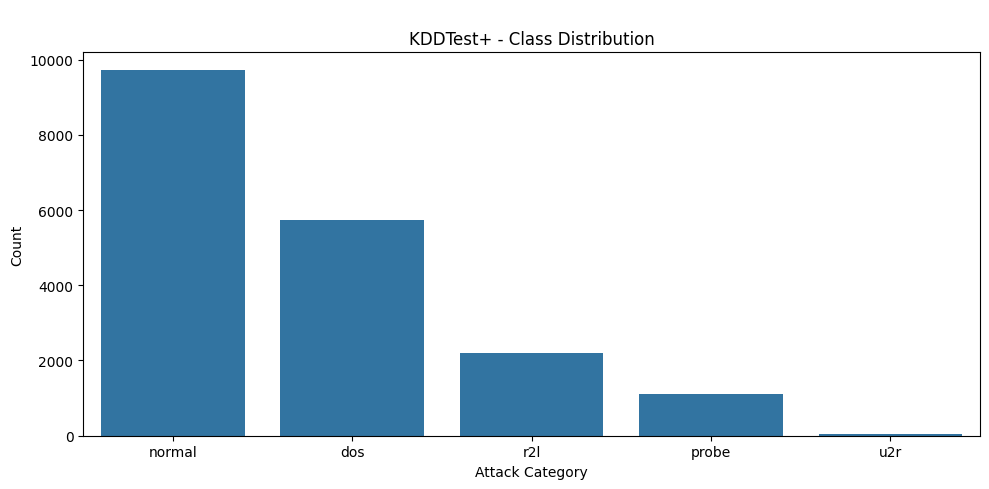

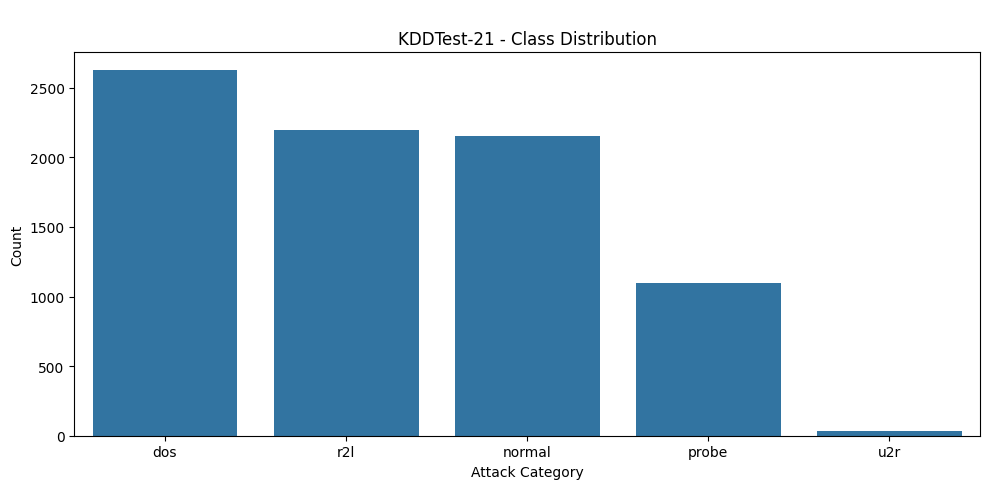

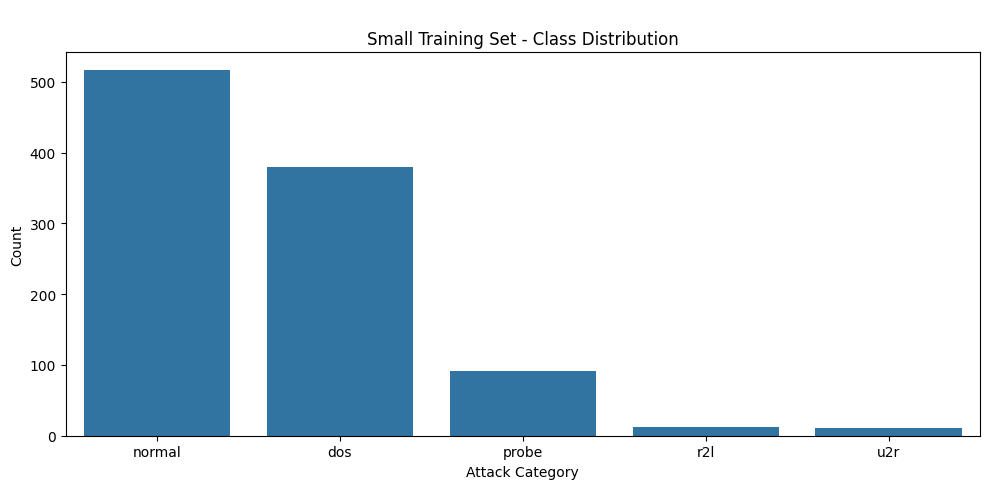

In [17]:
def plot_class_dist(df, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(x='attack_category', data=df, order=df['attack_category'].value_counts().index)
    plt.title(title)
    plt.xlabel('Attack Category')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

plot_class_dist(train, 'KDDTrain+ - Class Distribution')
plot_class_dist(train_20, '\nKDDTrain+_20Percent - Class Distribution')
plot_class_dist(test, '\nKDDTest+ - Class Distribution')
plot_class_dist(test_21, '\nKDDTest-21 - Class Distribution')
plot_class_dist(small_train, '\nSmall Training Set - Class Distribution')

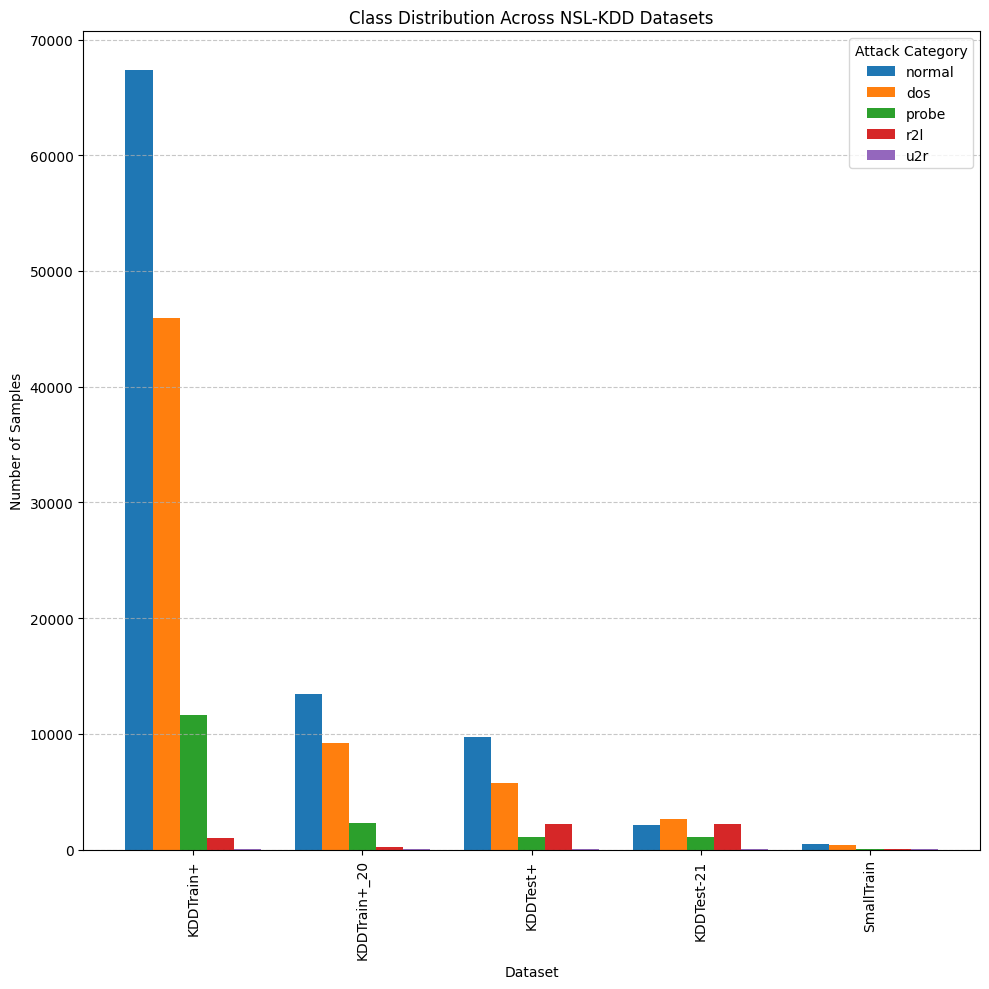

In [18]:
class_distribution = {
    'KDDTrain+': train['attack_category'].value_counts(),
    'KDDTrain+_20': train_20['attack_category'].value_counts(),
    'KDDTest+': test['attack_category'].value_counts(),
    'KDDTest-21': test_21['attack_category'].value_counts(),
    'SmallTrain': small_train['attack_category'].value_counts()
}

# Convert to DataFrame for plotting
dist_df = pd.DataFrame(class_distribution).fillna(0).astype(int)

# Sort index to maintain category order
dist_df = dist_df.loc[['normal', 'dos', 'probe', 'r2l', 'u2r']]

# Plot grouped bar chart
dist_df.T.plot(kind='bar', figsize=(10, 10), width=0.8)
plt.title('Class Distribution Across NSL-KDD Datasets')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.legend(title='Attack Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Observations:**

*   Across all datasets, the **normal and dos** categories are **heavily dominant**.
*   **r2l and u2r** are **significantly underrepresented**, especially u2r.
*   This **imbalance** is a major concern for classification models, as they may **perform poorly on rare attack types** (like u2r and r2l).


---
# **KDDTrain+_20Percent (train focused), KDDTest+ and KDDTest-21 (test focused)**

**6. Correlation Heatmap**

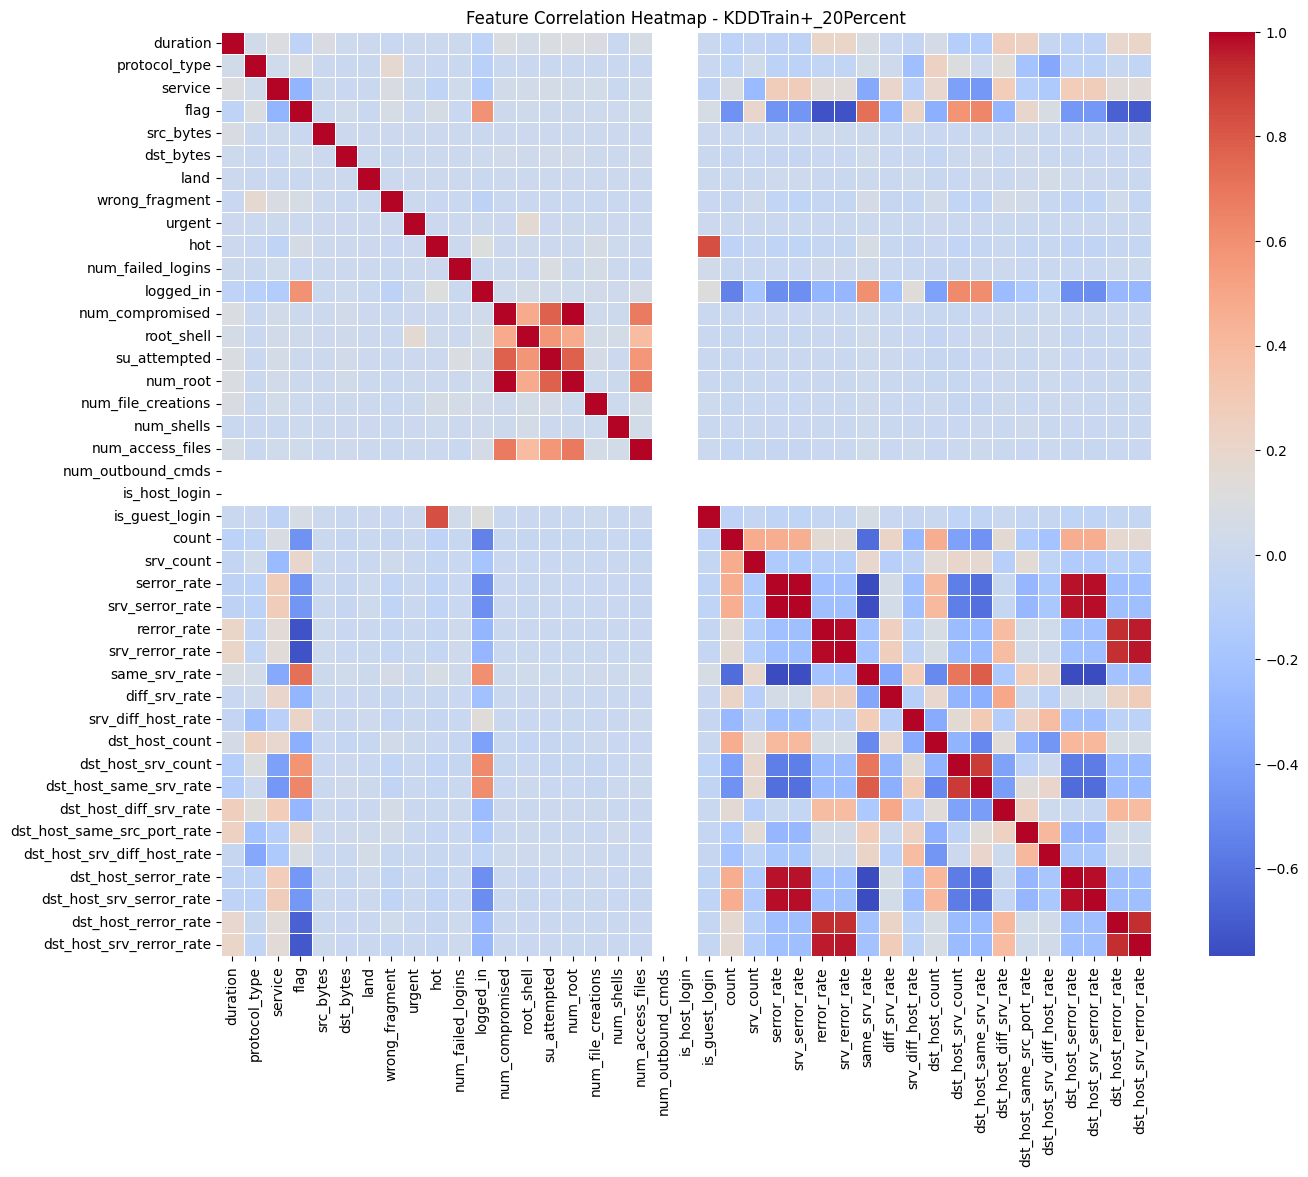

In [19]:
numeric_train_20 = train_20.drop(columns=['attack_types', 'attack_category', 'difficulty_level'])

corr_matrix = numeric_train_20.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap - KDDTrain+_20Percent")
plt.show()

In [20]:
# Identify highly correlated pairs
threshold = 0.9
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname1 = corr_matrix.columns[i]
            colname2 = corr_matrix.columns[j]
            high_corr.append((colname1, colname2, corr_matrix.iloc[i, j]))

# Display results
for col1, col2, corr_val in high_corr:
    print(f"{col1} and {col2} → correlation: {corr_val:.2f}")

num_root and num_compromised → correlation: 1.00
srv_serror_rate and serror_rate → correlation: 0.99
srv_rerror_rate and rerror_rate → correlation: 0.99
dst_host_serror_rate and serror_rate → correlation: 0.98
dst_host_serror_rate and srv_serror_rate → correlation: 0.98
dst_host_srv_serror_rate and serror_rate → correlation: 0.98
dst_host_srv_serror_rate and srv_serror_rate → correlation: 0.98
dst_host_srv_serror_rate and dst_host_serror_rate → correlation: 0.98
dst_host_rerror_rate and rerror_rate → correlation: 0.93
dst_host_rerror_rate and srv_rerror_rate → correlation: 0.92
dst_host_srv_rerror_rate and rerror_rate → correlation: 0.96
dst_host_srv_rerror_rate and srv_rerror_rate → correlation: 0.97
dst_host_srv_rerror_rate and dst_host_rerror_rate → correlation: 0.93


In [21]:
# Final set of features to drop
redundant_features = [
    'num_compromised',
    'srv_serror_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'srv_rerror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate'
]

# Drop from train_20, test, and test_21 datasets
train_20_reduced = train_20.drop(columns=redundant_features)
test_reduced = test.drop(columns=redundant_features)
test_21_reduced = test_21.drop(columns=redundant_features)

print("KDDTrain+_20Percent:")
print("Original shape:", train_20.shape)
print("Reduced shape:", train_20_reduced.shape)

print("\nKDDTest+:")
print("Original shape:", test.shape)
print("Reduced shape:", test_reduced.shape)

print("\nKDDTest-21:")
print("Original shape:", test_21.shape)
print("Reduced shape:", test_21_reduced.shape)

KDDTrain+_20Percent:
Original shape: (25192, 44)
Reduced shape: (25192, 37)

KDDTest+:
Original shape: (18794, 44)
Reduced shape: (18794, 37)

KDDTest-21:
Original shape: (8110, 44)
Reduced shape: (8110, 37)



---

**7. Prepare Data for Modelling**

In [22]:
# Training set (KDDTrain+_20Percent)
X_train = train_20_reduced.drop(columns=['attack_types', 'attack_category', 'difficulty_level'])
y_train = train_20_reduced['attack_category']

# Test set 1 (KDDTest+)
X_test = test_reduced.drop(columns=['attack_types', 'attack_category', 'difficulty_level'])
y_test = test_reduced['attack_category']

# Test set 2 (KDDTest-21)
X_test_21 = test_21_reduced.drop(columns=['attack_types', 'attack_category', 'difficulty_level'])
y_test_21 = test_21_reduced['attack_category']

In [23]:
print("KDDTrain+_20Percent distribution:")
print(y_train.value_counts(normalize=True))

print("\nKDDTest+ distribution:")
print(y_test.value_counts(normalize=True))

print("\nKDDTest-21 distribution:")
print(y_test_21.value_counts(normalize=True))

KDDTrain+_20Percent distribution:
attack_category
normal    0.533860
dos       0.366545
probe     0.090862
r2l       0.008296
u2r       0.000437
Name: proportion, dtype: float64

KDDTest+ distribution:
attack_category
normal    0.516707
dos       0.305470
r2l       0.117005
probe     0.058849
u2r       0.001969
Name: proportion, dtype: float64

KDDTest-21 distribution:
attack_category
dos       0.323674
r2l       0.271147
normal    0.265351
probe     0.135265
u2r       0.004562
Name: proportion, dtype: float64


In [24]:
# ApplyHandle imbalance with SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [25]:
# Standardise training and testing sets on the resampled SMOTE data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)
X_test_21_scaled = scaler.transform(X_test_21)

In [26]:
# Define the formula for FPR

def calculate_fpr(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    print("\nFalse Positive Rate (FPR):")
    fpr_list = []
    support_list = []

    for i, label in enumerate(labels):
        FP = cm[:, i].sum() - cm[i, i]
        TN = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        FPR = FP / (FP + TN)
        fpr_list.append(FPR)
        support_list.append(cm[i, :].sum())

        print(f"{label}: {round(FPR * 100, 2)}%")

    macro_fpr = np.mean(fpr_list)
    print(f"\nMacro FPR: {round(macro_fpr * 100, 2)}%")

    total_samples = np.sum(support_list)
    weighted_fpr = np.sum(np.array(fpr_list) * np.array(support_list)) / total_samples
    print(f"Weighted FPR: {round(weighted_fpr * 100, 2)}%")



---

**8. Model Training**

# **8.1 RANDOM FOREST**

In [ ]:
# Hyperparameter tuning

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

rf_para_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "bootstrap": [True, False]
}

# Grid search with 3-fold cross-validation
rf_grid_search = GridSearchCV(rf, rf_para_grid, cv=3, scoring="f1_macro", n_jobs=-1)
rf_grid_search.fit(X_train_scaled, y_train_smote)

print("Optimal Hyperparameters (rf):\n", rf_grid_search.best_params_)

Optimal Hyperparameters (rf):
 {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluate on KDDTest+
y_pred_rf = rf_grid_search.best_estimator_.predict(X_test_scaled)

print("\n--- Evaluation on KDDTest+ (rf) ---\n")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

calculate_fpr(y_test, y_pred_rf, labels=rf_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest+ (rf) ---

Accuracy: 0.8741619665850804
Classification Report:
               precision    recall  f1-score   support

         dos       0.99      1.00      0.99      5741
      normal       0.82      0.97      0.89      9711
       probe       0.84      1.00      0.91      1106
         r2l       1.00      0.07      0.13      2199
         u2r       0.40      0.05      0.10        37

    accuracy                           0.87     18794
   macro avg       0.81      0.62      0.60     18794
weighted avg       0.89      0.87      0.83     18794

Confusion Matrix:
 [[5721   10   10    0    0]
 [  66 9449  194    0    2]
 [   0    3 1103    0    0]
 [   1 2042    1  154    1]
 [   0   35    0    0    2]]

False Positive Rate (FPR):
dos: 0.51%
normal: 23.01%
probe: 1.16%
r2l: 0.0%
u2r: 0.02%

Macro FPR: 4.94%
Weighted FPR: 12.11%


In [ ]:
# Evaluate on KDDTest-21
y_pred_rf_21 = rf_grid_search.best_estimator_.predict(X_test_21_scaled)

print("\n--- Evaluation on KDDTest-21 (rf) ---\n")
print("Accuracy:", accuracy_score(y_test_21, y_pred_rf_21))
print("Classification Report:\n", classification_report(y_test_21, y_pred_rf_21))
print("Confusion Matrix:\n", confusion_matrix(y_test_21, y_pred_rf_21))

calculate_fpr(y_test_21, y_pred_rf_21, labels=rf_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest-21 (rf) ---

Accuracy: 0.7085080147965475
Classification Report:
               precision    recall  f1-score   support

         dos       0.97      0.99      0.98      2625
      normal       0.48      0.88      0.62      2152
       probe       0.84      1.00      0.91      1097
         r2l       1.00      0.07      0.13      2199
         u2r       0.50      0.05      0.10        37

    accuracy                           0.71      8110
   macro avg       0.76      0.60      0.55      8110
weighted avg       0.83      0.71      0.64      8110

Confusion Matrix:
 [[2605   10   10    0    0]
 [  66 1891  194    0    1]
 [   0    3 1094    0    0]
 [   1 2042    1  154    1]
 [   0   35    0    0    2]]

False Positive Rate (FPR):
dos: 1.22%
normal: 35.08%
probe: 2.92%
r2l: 0.0%
u2r: 0.02%

Macro FPR: 7.85%
Weighted FPR: 10.1%


# **8.2 KNN**

In [ ]:
knn = KNeighborsClassifier()

knn_para_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid_search = GridSearchCV(knn, knn_para_grid, cv=3, scoring="f1_macro", n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train_smote)

print("Optimal Hyperparameters (knn):", knn_grid_search.best_params_)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.9951292  0.99620311 0.99369463 0.995456   0.99284157 0.99484392
        nan 0.99700754        nan 0.99656035        nan 0.99594875]
  warnings.warn(


Optimal Hyperparameters (knn): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Evaluate on KDDTest+
y_pred_knn = knn_grid_search.best_estimator_.predict(X_test_scaled)

print("\n--- Evaluation on KDDTest+ (knn) ---\n")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

calculate_fpr(y_test, y_pred_knn, labels=knn_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest+ (knn) ---

Accuracy: 0.8622432691284453
Classification Report:
               precision    recall  f1-score   support

         dos       0.99      0.97      0.98      5741
      normal       0.80      0.97      0.88      9711
       probe       0.80      0.78      0.79      1106
         r2l       0.97      0.13      0.24      2199
         u2r       0.50      0.41      0.45        37

    accuracy                           0.86     18794
   macro avg       0.81      0.65      0.67     18794
weighted avg       0.88      0.86      0.83     18794

Confusion Matrix:
 [[5587  134   20    0    0]
 [  56 9449  189    6   11]
 [   0  247  859    0    0]
 [   0 1891    9  295    4]
 [   0   18    0    4   15]]

False Positive Rate (FPR):
dos: 0.43%
normal: 25.21%
probe: 1.23%
r2l: 0.06%
u2r: 0.08%

Macro FPR: 5.4%
Weighted FPR: 13.24%


In [ ]:
# Evaluate on KDDTest-21
y_pred_knn_21 = knn_grid_search.best_estimator_.predict(X_test_21_scaled)

print("\n--- Evaluation on KDDTest-21 (knn) ---\n")
print("Accuracy:", accuracy_score(y_test_21, y_pred_knn_21))
print("Classification Report:\n", classification_report(y_test_21, y_pred_knn_21))
print("Confusion Matrix:\n", confusion_matrix(y_test_21, y_pred_knn_21))

calculate_fpr(y_test_21, y_pred_knn_21, labels=knn_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest-21 (knn) ---

Accuracy: 0.6827373612823674
Classification Report:
               precision    recall  f1-score   support

         dos       0.98      0.94      0.96      2625
      normal       0.45      0.89      0.60      2152
       probe       0.80      0.77      0.79      1097
         r2l       0.98      0.13      0.24      2199
         u2r       0.56      0.41      0.47        37

    accuracy                           0.68      8110
   macro avg       0.75      0.63      0.61      8110
weighted avg       0.81      0.68      0.64      8110

Confusion Matrix:
 [[2471  134   20    0    0]
 [  56 1906  180    2    8]
 [   0  247  850    0    0]
 [   0 1891    9  295    4]
 [   0   18    0    4   15]]

False Positive Rate (FPR):
dos: 1.02%
normal: 38.44%
probe: 2.98%
r2l: 0.1%
u2r: 0.15%

Macro FPR: 8.54%
Weighted FPR: 10.96%


# **8.3 SVM**

In [ ]:

svm = SVC(class_weight='balanced')

svm_para_grid = {
    'C': [1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(svm, svm_para_grid, cv=3, scoring="f1_macro", n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train_smote)

print("Optimal Hyperparameters (svm):", svm_grid_search.best_params_)

Optimal Hyperparameters (svm): {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
# Evaluate on KDDTest+
y_pred_svm = svm_grid_search.best_estimator_.predict(X_test_scaled)

print("\n--- Evaluation on KDDTest+ (svm) ---\n")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

calculate_fpr(y_test, y_pred_svm, labels=svm_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest+ (svm) ---

Accuracy: 0.8769288070660849
Classification Report:
               precision    recall  f1-score   support

         dos       0.99      0.99      0.99      5741
      normal       0.83      0.97      0.89      9711
       probe       0.82      0.98      0.89      1106
         r2l       0.93      0.14      0.24      2199
         u2r       0.22      0.14      0.17        37

    accuracy                           0.88     18794
   macro avg       0.76      0.64      0.64     18794
weighted avg       0.89      0.88      0.84     18794

Confusion Matrix:
 [[5688   36   16    1    0]
 [  55 9405  220   17   14]
 [   1   23 1082    0    0]
 [   0 1891    3  301    4]
 [   0   29    0    3    5]]

False Positive Rate (FPR):
dos: 0.43%
normal: 21.79%
probe: 1.35%
r2l: 0.13%
u2r: 0.1%

Macro FPR: 4.76%
Weighted FPR: 11.48%


In [ ]:
# Evaluate on KDDTest-21
y_pred_svm_21 = svm_grid_search.best_estimator_.predict(X_test_21_scaled)

print("\n--- Evaluation on KDDTest-21 (knn) ---\n")
print("Accuracy:", accuracy_score(y_test_21, y_pred_svm_21))
print("Classification Report:\n", classification_report(y_test_21, y_pred_svm_21))
print("Confusion Matrix:\n", confusion_matrix(y_test_21, y_pred_svm_21))

calculate_fpr(y_test_21, y_pred_svm_21, labels=svm_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest-21 (knn) ---

Accuracy: 0.7161528976572133
Classification Report:
               precision    recall  f1-score   support

         dos       0.98      0.98      0.98      2625
      normal       0.48      0.86      0.62      2152
       probe       0.82      0.98      0.89      1097
         r2l       0.94      0.14      0.24      2199
         u2r       0.25      0.14      0.18        37

    accuracy                           0.72      8110
   macro avg       0.70      0.62      0.58      8110
weighted avg       0.81      0.72      0.67      8110

Confusion Matrix:
 [[2572   36   16    1    0]
 [  55 1857  215   14   11]
 [   1   23 1073    0    0]
 [   0 1891    3  301    4]
 [   0   29    0    3    5]]

False Positive Rate (FPR):
dos: 1.02%
normal: 33.22%
probe: 3.34%
r2l: 0.3%
u2r: 0.19%

Macro FPR: 7.61%
Weighted FPR: 9.68%


# **8.4 MultinomialNB**

In [ ]:
scaler_mm = MinMaxScaler()

X_train_mm = scaler_mm.fit_transform(X_train_smote)
X_test_mm = scaler_mm.transform(X_test_scaled)
X_test_21_mm = scaler_mm.transform(X_test_21)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
nb = MultinomialNB()

nb_para_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

nb_grid_search = GridSearchCV(nb, nb_para_grid, cv=3, scoring="f1_macro", n_jobs=-1)
nb_grid_search.fit(X_train_mm, y_train_smote)

print("Optimal Hyperparameters (nb):", nb_grid_search.best_params_)

Optimal Hyperparameters (nb): {'alpha': 0.1}


In [ ]:
# Evaluate on KDDTest+
y_pred_nb = nb_grid_search.best_estimator_.predict(X_test_scaled)

print("\n--- Evaluation on KDDTest+ (nb) ---\n")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

calculate_fpr(y_test, y_pred_nb, labels=nb_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest+ (nb) ---

Accuracy: 0.4974459934021496
Classification Report:
               precision    recall  f1-score   support

         dos       0.79      0.91      0.84      5741
      normal       0.92      0.24      0.38      9711
       probe       0.58      0.73      0.64      1106
         r2l       0.95      0.44      0.60      2199
         u2r       0.00      0.73      0.01        37

    accuracy                           0.50     18794
   macro avg       0.65      0.61      0.50     18794
weighted avg       0.86      0.50      0.56     18794

Confusion Matrix:
 [[5202  182  130    0  227]
 [1125 2346  431   51 5758]
 [ 244    0  805    0   57]
 [  11   10   31  969 1178]
 [   0    7    0    3   27]]

False Positive Rate (FPR):
dos: 10.57%
normal: 2.19%
probe: 3.35%
r2l: 0.33%
u2r: 38.49%

Macro FPR: 10.99%
Weighted FPR: 4.67%


In [ ]:
# Evaluate on KDDTest-21
y_pred_nb_21 = nb_grid_search.best_estimator_.predict(X_test_21_scaled)

print("\n--- Evaluation on KDDTest-21 (nb) ---\n")
print("Accuracy:", accuracy_score(y_test_21, y_pred_nb_21))
print("Classification Report:\n", classification_report(y_test_21, y_pred_nb_21))
print("Confusion Matrix:\n", confusion_matrix(y_test_21, y_pred_nb_21))

calculate_fpr(y_test_21, y_pred_nb_21, labels=nb_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest-21 (nb) ---

Accuracy: 0.4932182490752158
Classification Report:
               precision    recall  f1-score   support

         dos       0.61      0.80      0.70      2625
      normal       0.34      0.05      0.08      2152
       probe       0.66      0.73      0.69      1097
         r2l       0.96      0.44      0.60      2199
         u2r       0.01      0.73      0.02        37

    accuracy                           0.49      8110
   macro avg       0.52      0.55      0.42      8110
weighted avg       0.64      0.49      0.50      8110

Confusion Matrix:
 [[2101  182  115    0  227]
 [1068  101  271   37  675]
 [ 238    0  802    0   57]
 [  11   10   31  969 1178]
 [   0    7    0    3   27]]

False Positive Rate (FPR):
dos: 24.01%
normal: 3.34%
probe: 5.95%
r2l: 0.68%
u2r: 26.47%

Macro FPR: 12.09%
Weighted FPR: 9.77%


# **8.5 XGBoost**

In [27]:
# Encode Attack Labels

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train_smote)
y_test_encoded = le.transform(y_test)
y_test_21_encoded = le.transform(y_test_21)

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_para_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1.0]
}

xgb_grid_search = GridSearchCV(xgb, xgb_para_grid, cv=3, scoring="f1_macro", n_jobs=-1)
xgb_grid_search.fit(X_train_scaled, y_train_encoded)

print("Optimal Hyperparameters (xgb):", xgb_grid_search.best_params_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:17:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Optimal Hyperparameters (xgb): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}


In [ ]:
# Evaluate on KDDTest+
y_pred_xgb = xgb_grid_search.best_estimator_.predict(X_test_scaled)

print("\n--- Evaluation on KDDTest+ (xgb) ---\n")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_xgb))

calculate_fpr(y_test_encoded, y_pred_xgb, labels=xgb_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest+ (xgb) ---

Accuracy: 0.8893795892306056
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5741
           1       0.84      0.97      0.90      9711
           2       0.83      1.00      0.91      1106
           3       0.99      0.21      0.35      2199
           4       0.29      0.11      0.16        37

    accuracy                           0.89     18794
   macro avg       0.79      0.66      0.66     18794
weighted avg       0.90      0.89      0.86     18794

Confusion Matrix:
 [[5717   11   13    0    0]
 [  72 9426  206    4    3]
 [   0    0 1106    0    0]
 [   0 1722    8  462    7]
 [   0   33    0    0    4]]

False Positive Rate (FPR):
0: 0.55%
1: 19.44%
2: 1.28%
3: 0.02%
4: 0.05%

Macro FPR: 4.27%
Weighted FPR: 10.29%


In [ ]:
# Evaluate on KDDTest-21
y_pred_xgb_21 = xgb_grid_search.best_estimator_.predict(X_test_21_scaled)

print("\n--- Evaluation on KDDTest-21 (xgb) ---\n")
print("Accuracy:", accuracy_score(y_test_21_encoded, y_pred_xgb_21))
print("Classification Report:\n", classification_report(y_test_21_encoded, y_pred_xgb_21))
print("Confusion Matrix:\n", confusion_matrix(y_test_21_encoded, y_pred_xgb_21))

calculate_fpr(y_test_21_encoded, y_pred_xgb_21, labels=xgb_grid_search.best_estimator_.classes_)


--- Evaluation on KDDTest-21 (xgb) ---

Accuracy: 0.7437731196054254
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2625
           1       0.51      0.87      0.65      2152
           2       0.83      1.00      0.91      1097
           3       0.99      0.21      0.35      2199
           4       0.31      0.11      0.16        37

    accuracy                           0.74      8110
   macro avg       0.72      0.64      0.61      8110
weighted avg       0.83      0.74      0.71      8110

Confusion Matrix:
 [[2601   11   13    0    0]
 [  72 1868  206    4    2]
 [   0    0 1097    0    0]
 [   0 1722    8  462    7]
 [   0   33    0    0    4]]

False Positive Rate (FPR):
0: 1.31%
1: 29.64%
2: 3.24%
3: 0.07%
4: 0.11%

Macro FPR: 6.87%
Weighted FPR: 8.75%


# **8.6 Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state=42, class_weight="balanced")

lr_para_grid = {
    "penalty": ["l1", "l2", "none"],
    "C": [0.1, 1, 10],
    "solver": ["lbfgs", "saga"],
    "max_iter": [500, 1000]
}

lr_grid_search = GridSearchCV(lr, lr_para_grid, cv=3, scoring="f1_macro", n_jobs=-1)
lr_grid_search.fit(X_train_scaled, y_train_smote)

print("Optimal Hyperparameters (lr):\n", lr_grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
# Evaluate on KDDTest+
y_pred_lr = lr_grid_search.best_estimator_.predict(X_test_scaled)

print("\n--- Evaluation on KDDTest+ (lr) ---\n")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

calculate_fpr(y_test, y_pred_lr, labels=lr_grid_search.best_estimator_.classes_)

In [ ]:
# Evaluate on KDDTest-21
y_pred_lr_21 = lr_grid_search.best_estimator_.predict(X_test_21_scaled)

print("\n--- Evaluation on KDDTest-21 (rf) ---\n")
print("Accuracy:", accuracy_score(y_test_21, y_pred_lr_21))
print("Classification Report:\n", classification_report(y_test_21, y_pred_lr_21))
print("Confusion Matrix:\n", confusion_matrix(y_test_21, y_pred_lr_21))

calculate_fpr(y_test_21, y_pred_lr_21, labels=lr_grid_search.best_estimator_.classes_)

#**Create pipelines for top models**

**9.1 RF**

In [28]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}

rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

rf_grid_search.fit(X_train_smote, y_train_encoded)
print("RF Best params:", rf_grid_search.best_params_)

RF Best params: {'model__bootstrap': False, 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}




---

**9.2 SVM**

In [ ]:
# @title
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42))
])

svm_param_grid = {
    'model__C': [1, 10, 100],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

svm_grid_search.fit(X_train_smote, y_train_smote)
print("SVM Best params:", svm_grid_search.best_params_)

KeyboardInterrupt: 


---

**9.3 XGBoost**

In [29]:
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

xgb_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.7, 1.0]
}

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

xgb_grid_search.fit(X_train_smote, y_train_encoded)
print("XGB Best params:", xgb_grid_search.best_params_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:54:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGB Best params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.7}




---
**9.4 Save pipelines as .joblib**

In [33]:
joblib.dump(rf_grid_search.best_estimator_, "rf_pipeline.joblib")
joblib.dump(xgb_grid_search.best_estimator_, "xgb_pipeline.joblib")

['xgb_pipeline.joblib']


---

**9.5 Test first rows**

In [34]:
loaded_rf = joblib.load('rf_pipeline.joblib')
sample_preds = loaded_rf.predict(X_test[:5])
print(sample_preds)

[0 0 1 1 1]


In [35]:
loaded_xgb = joblib.load('xgb_pipeline.joblib')
sample_preds = loaded_xgb.predict(X_test[:5])
print(sample_preds)

[0 0 1 1 1]


# **FastAPI App**

In [46]:
app = FastAPI()

rf_pipeline = joblib.load("rf_pipeline.joblib")
xgb_pipeline = joblib.load("xgb_pipeline.joblib")

class PredictRequest(BaseModel):
    features: list

@app.get("/")
def root():
    return {
        "message": "🚀 NSL-KDD FastAPI is running!",
        "docs_url": "/docs",
        "endpoints": {
            "health": "/health",
            "predict": "/predict"
        }
    }

@app.get("/health")
def health():
    return {"status": "ok", "message": "NSL-KDD API is running"}

@app.post("/predict")
def predict(request: PredictRequest):
    df = pd.DataFrame([request.features])
    pred_rf = rf_pipeline.predict(df)[0]
    pred_xgb = xgb_pipeline.predict(df)[0]
    return {
        "RF": str(pred_rf),
        "XGB": str(pred_xgb),
    }

# **ngrok Tunnel Setup**

In [47]:
!ngrok config add-authtoken 32yWVUcjc21szL7qfg1uqzNcA90_zZ9ZDTDgRZNRDq4LveVE

nest_asyncio.apply()

ngrok.kill()

public_url = ngrok.connect(8000)
print("Public URL:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://b9fc9b3e02bd.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [654]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     122.150.160.20:0 - "GET / HTTP/1.1" 200 OK
INFO:     122.150.160.20:0 - "GET /favicon.ico HTTP/1.1" 404 Not Found
INFO:     122.150.160.20:0 - "GET /docs HTTP/1.1" 200 OK


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-7' coro=<Server.serve() done, defined at /usr/local/lib/python3.12/dist-packages/uvicorn/server.py:69> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.12/dist-packages/uvicorn/server.py", line 67, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.12/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run
    se

INFO:     122.150.160.20:0 - "GET /openapi.json HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [654]
